In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

2024-07-22 10:41:22.413287: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 10:41:22.413372: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 10:41:22.413409: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 10:41:22.421806: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [4]:
df = pd.read_csv('/home/work/gnssl/kddcup.data', header=None)

feature_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

# Rename the columns of the DataFrame
df.columns = feature_names

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df['label']

0          normal.
1          normal.
2          normal.
3          normal.
4          normal.
            ...   
4898426    normal.
4898427    normal.
4898428    normal.
4898429    normal.
4898430    normal.
Name: label, Length: 4898431, dtype: object

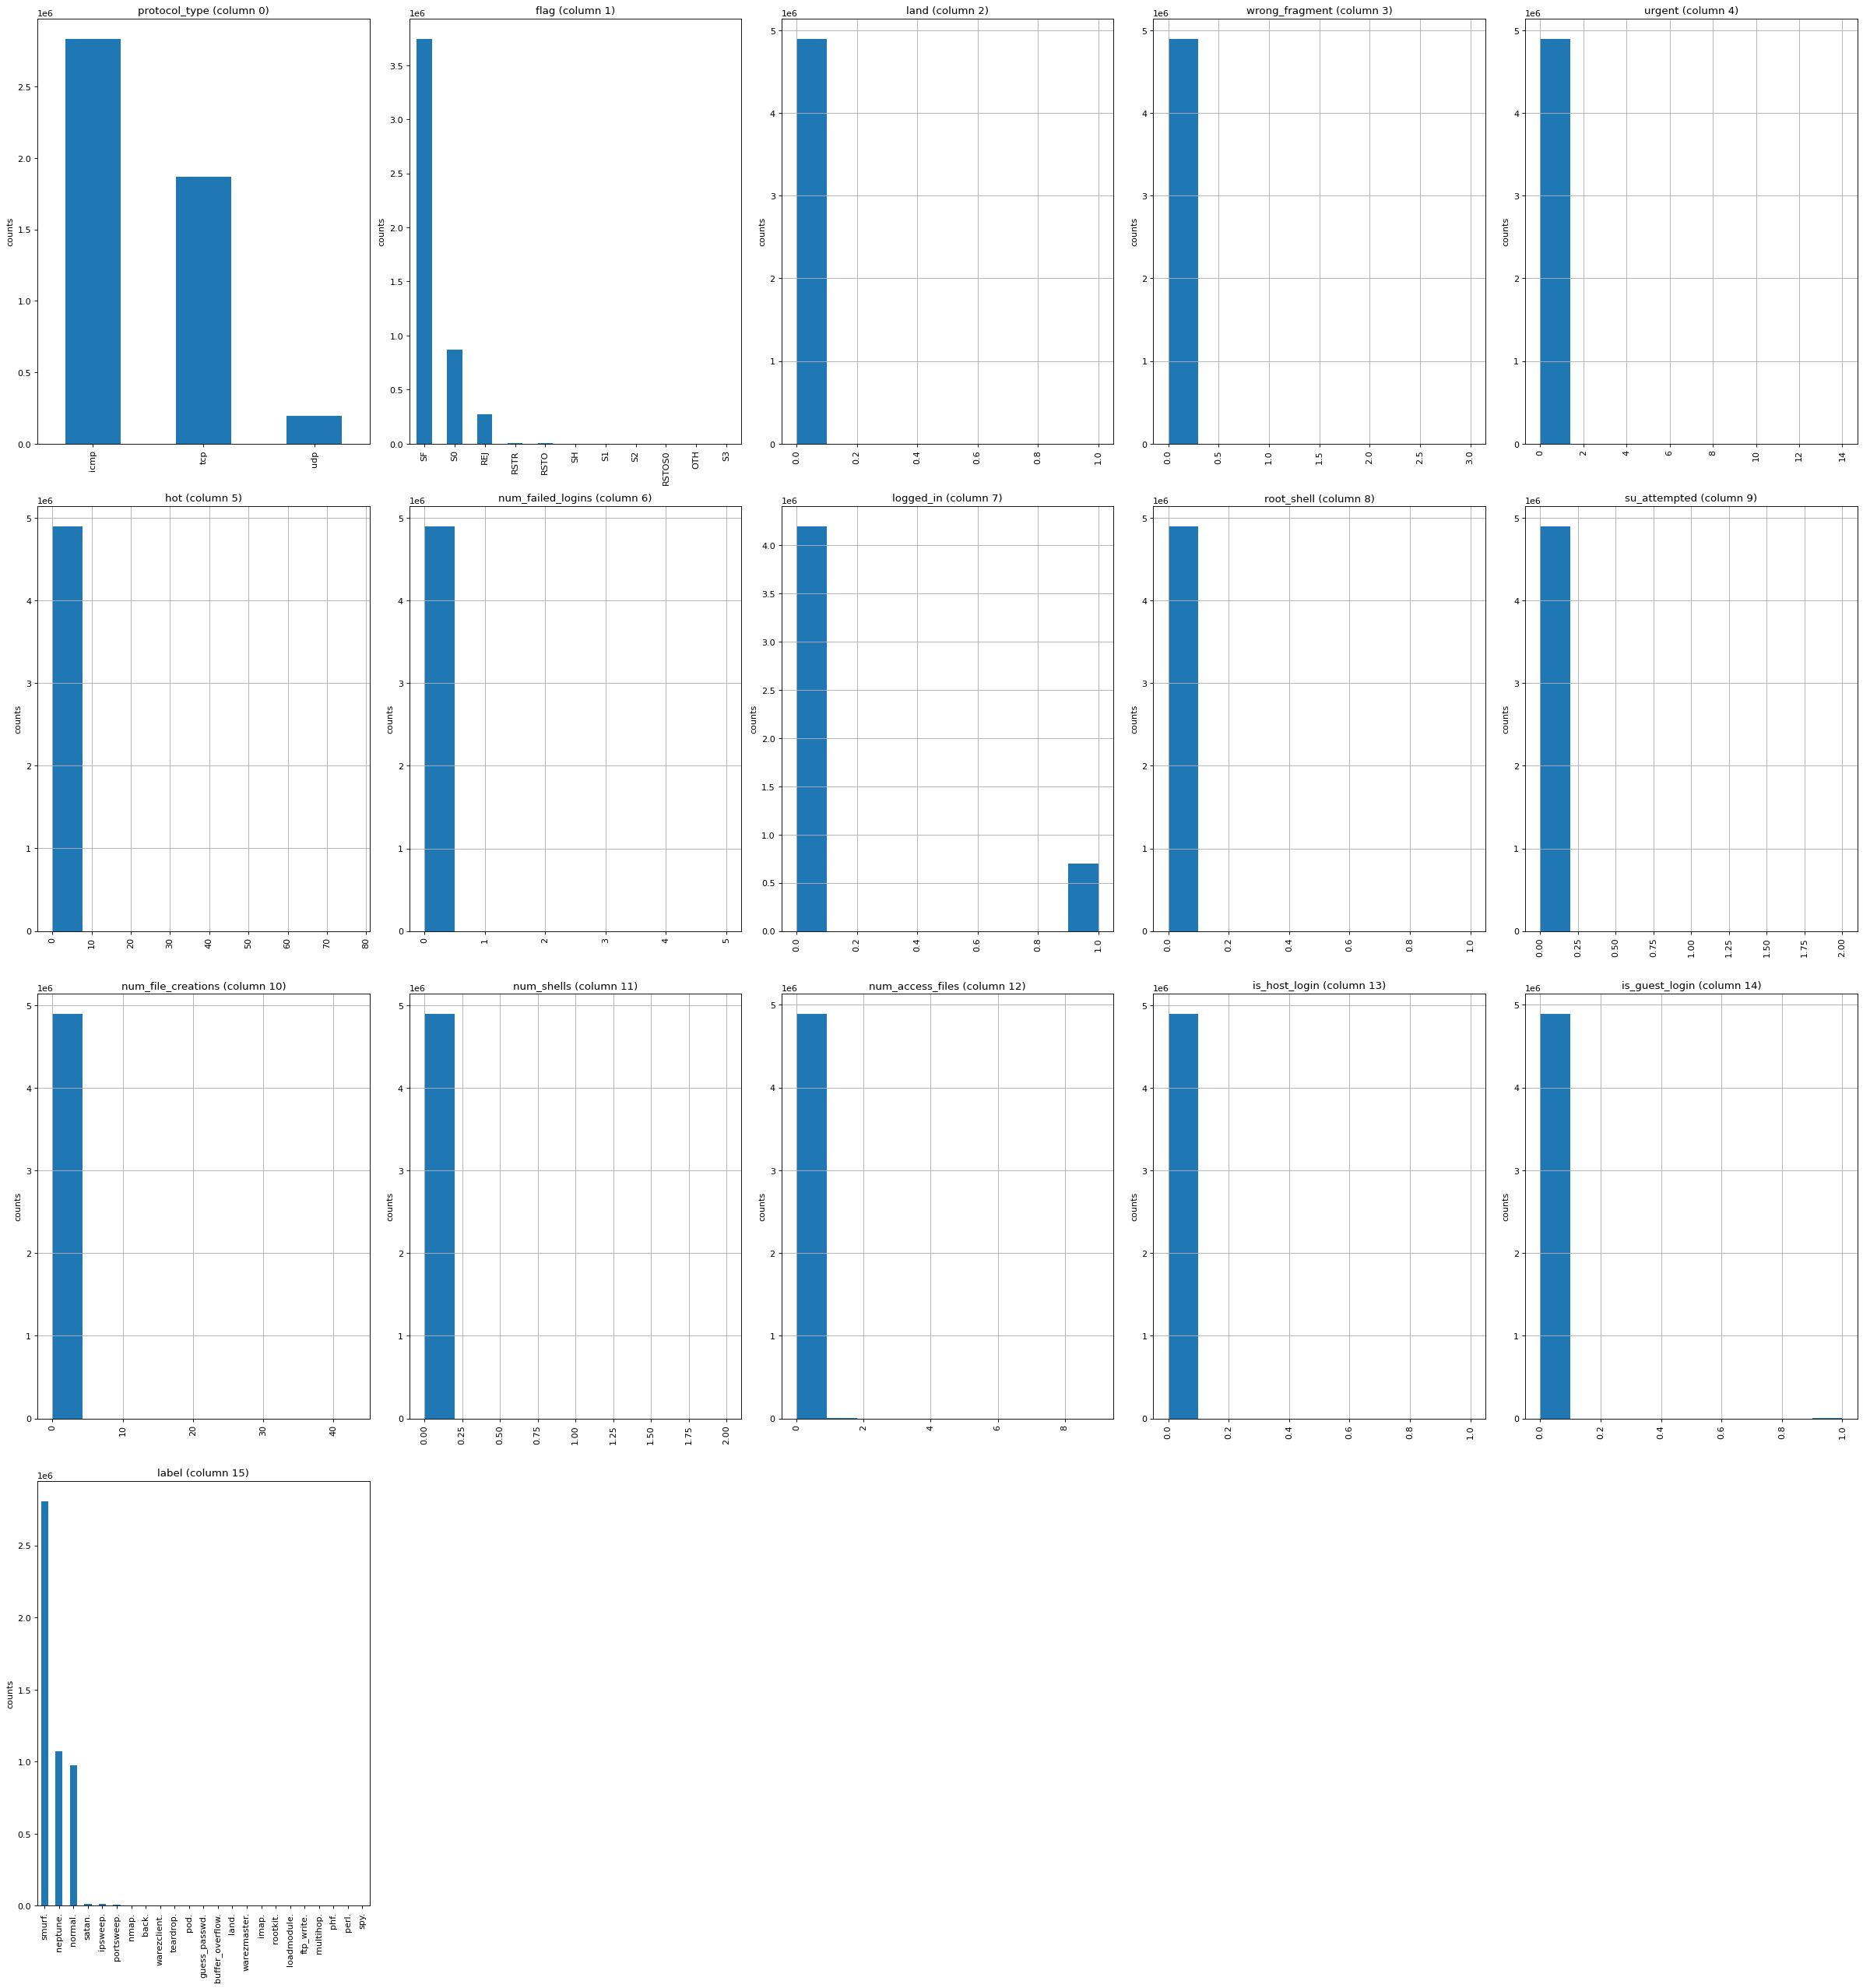

In [6]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
    
plotPerColumnDistribution(df, 79, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [8]:
df_normal = df.loc[df['label']=='normal.']
df_attack = df.loc[df['label']!='normal.']

normal_df_train = df.loc[df['label']=='normal.']
normal_df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [9]:
!pip install -U numpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astropy 6.0.0 requires numpy<2,>=1.22, but you have numpy 2.0.1 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.1 which is incompatible.
cudf 23.12.0 requires numpy<1.25,>=1.21, but you have numpy 2.0.1 which is incompatible.
cupy-cuda12x 12.3.0 requires numpy<1.29,>=1.20, but you have numpy 2.0.1 which is incompatible.
dask-cudf 23.12.0 requires numpy<1.25,>=1.21, but you have numpy 2.0.1 which is incompatible.
httpstan 4.6.1 requires numpy<2.0,>=1.16, but you have numpy 2.0.1 which is incompatible.
mat

In [10]:
# 'label' 열의 값이 'normal.'이면 0으로, 'normal.'이 아니면 1로 변경
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)

# 변경된 데이터프레임 확인
print(df.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        215      45076     0   
1         0           tcp    http   SF        162       4528     0   
2         0           tcp    http   SF        236       1228     0   
3         0           tcp    http   SF        233       2032     0   
4         0           tcp    http   SF        239        486     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   0   
1               0       0    0  ...                   1   
2               0       0    0  ...                   2   
3               0       0    0  ...                   3   
4               0       0    0  ...                   4   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

In [11]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df['service'] = label_encoder.fit_transform(df['service'])
df['flag'] = label_encoder.fit_transform(df['flag'])

# 인코딩된 데이터프레임 확인
print(df.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       24     9        215      45076     0   
1         0              1       24     9        162       4528     0   
2         0              1       24     9        236       1228     0   
3         0              1       24     9        233       2032     0   
4         0              1       24     9        239        486     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   0   
1               0       0    0  ...                   1   
2               0       0    0  ...                   2   
3               0       0    0  ...                   3   
4               0       0    0  ...                   4   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0

In [12]:
columns_list = ['flag', 'count', 'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'label']
df=df[columns_list]


In [13]:
df.shape

(4898431, 9)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(df, test_size=0.1, random_state=42)
X_train.shape, X_val.shape

((4408587, 9), (489844, 9))

In [15]:
y_val = X_val['label']

In [16]:
X_train['label'].value_counts()

1    3533113
0     875474
Name: label, dtype: int64

In [18]:
normal = X_train[X_train['label'] == 0]
normal.shape

(875474, 9)

In [19]:
X_train_normal, X_test_normal = train_test_split(normal, test_size=0.1, random_state=42)
X_train_normal.shape, X_test_normal.shape

((787926, 9), (87548, 9))

In [21]:
y_train = X_train_normal['label']
X_train_normal = X_train_normal.drop(labels='label', axis=1)

y_test = X_test_normal['label']
X_test_normal = X_test_normal.drop(labels='label', axis=1)

y_val = X_val['label']
X_val = X_val.drop(labels='label', axis=1)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_normal)
scaler.fit(X_val)
scaler.fit(X_test_normal)

X_train_ft = scaler.transform(X_train_normal)
X_val_ft = scaler.transform(X_val)
X_test = scaler.transform(X_test_normal)

In [24]:
#reshape inputs for LSTM [samples, timesteps, features]

X_train_ft = X_train_ft.reshape(X_train_ft.shape[0], 1, X_train_ft.shape[1])
print("Training data shape:", X_train_ft.shape)

X_val_ft = X_val_ft.reshape(X_val_ft.shape[0], 1, X_val_ft.shape[1])
print("Validation data shape:", X_val_ft.shape)

X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)


Training data shape: (787926, 1, 8)
Validation data shape: (489844, 1, 8)
Test data shape: (87548, 1, 8)


In [25]:
X_train_ft.shape, X_val_ft.shape, X_test.shape

((787926, 1, 8), (489844, 1, 8), (87548, 1, 8))

In [26]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [37]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(8, activation='tanh', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='tanh', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='tanh', return_sequences=True)(L3)
    L5 = LSTM(8, activation='tanh', return_sequences=True)(L4)
    
    # Adding a Dense layer for feature representation
    dense_layer = Dense(X.shape[2])(L5)
    
    output = TimeDistributed(Dense(X.shape[2]))(dense_layer)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [38]:
#create the autoencoder model

model = autoencoder_model(X_train_ft)
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 8)]            0         
                                                                 
 lstm_12 (LSTM)              (None, 1, 8)              544       
                                                                 
 lstm_13 (LSTM)              (None, 4)                 208       
                                                                 
 repeat_vector_3 (RepeatVec  (None, 1, 4)              0         
 tor)                                                            
                                                                 
 lstm_14 (LSTM)              (None, 1, 4)              144       
                                                                 
 lstm_15 (LSTM)              (None, 1, 8)              416       
                                                           

In [39]:
# fit the model to the data
nb_epochs = 10
batch_size = 32
history = model.fit(X_train_ft, X_train_ft, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/10
23392/23392 [==============================] - 169s 7ms/step - loss: 0.0643 - accuracy: 0.5774 - val_loss: 0.0299 - val_accuracy: 0.3665
Epoch 2/10
23392/23392 [==============================] - 161s 7ms/step - loss: 0.0221 - accuracy: 0.4533 - val_loss: 0.0197 - val_accuracy: 0.2642
Epoch 3/10
23392/23392 [==============================] - 162s 7ms/step - loss: 0.0190 - accuracy: 0.4750 - val_loss: 0.0177 - val_accuracy: 0.3834
Epoch 4/10
23392/23392 [==============================] - 163s 7ms/step - loss: 0.0177 - accuracy: 0.4654 - val_loss: 0.0183 - val_accuracy: 0.2334
Epoch 5/10
23392/23392 [==============================] - 163s 7ms/step - loss: 0.0175 - accuracy: 0.4647 - val_loss: 0.0175 - val_accuracy: 0.3792
Epoch 6/10
23392/23392 [==============================] - 162s 7ms/step - loss: 0.0174 - accuracy: 0.4700 - val_loss: 0.0180 - val_accuracy: 0.2657
Epoch 7/10
23392/23392 [==============================] - 161s 7ms/step - loss: 0.0173 - accuracy: 0.4685 - val_

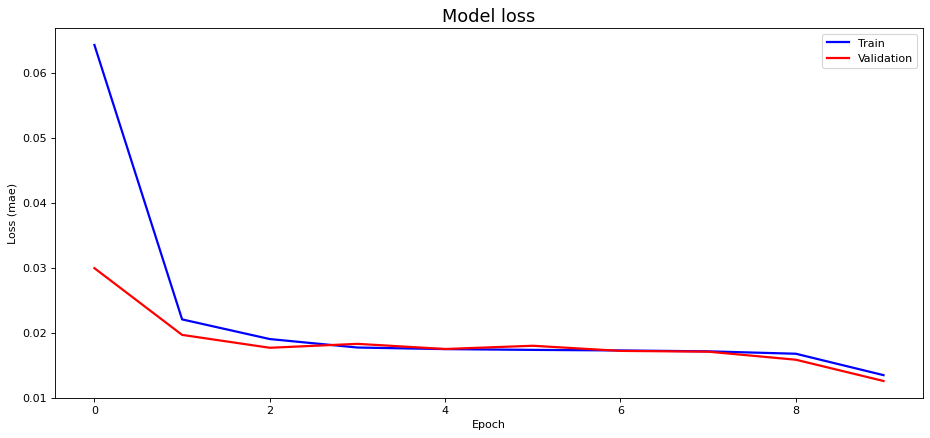

In [40]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [41]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [42]:
valid_x_predictions = model.predict(X_test)
mse = np.mean(np.power(flatten(X_test) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test.tolist()})

2736/2736 [==============================] - 8s 3ms/step


In [43]:
error_df

,reconstruction_error,true_class
0,0.000026,0
1,0.000050,0
2,0.000040,0
3,0.000047,0
4,0.019836,0
...,...,...
87543,0.000024,0
87544,0.000205,0
87545,0.000014,0
87546,0.000007,0


In [3]:
# TEST CODE 1

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.boxplot(x='true_class', y='reconstruction_error', data=error_df, showfliers=False, saturation=1)
plt.ylabel('Distribution')

#plt.axhline(y= 0.003, xmin=0.0, xmax=1,dashes=(5,5), c='g')

plt.xticks(rotation=90)
plt.show()


NameError: name 'error_df' is not defined

<Figure size 800x800 with 0 Axes>